<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/M%C3%B3dulo_3_Python_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 3**


# Análisis de datos con python


## Objetivos

Despues de completar este laboratorio, podra:

* Explorar caracteristicas para predecir el precio del automovil


<h2>Tabla de Contenido</h2>

- Importar datos del modulo
- Analisis de patrones de caracteristicas individuales mediante visualizacion
- Analisis Estadistico Descriptivo
- Conceptos básicos de agrupacion
- Correlacion y causalidad
- ANOVA
<hr>


<h3>¿Cuáles son las principales características que más inciden en el precio del coche?</h3>


In [ ]:
import pandas as pd
import numpy as np

Esta función descargará el conjunto de datos en su navegador


In [ ]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

Deberá descargar el conjunto de datos; si está ejecutando localmente, comente lo siguiente


In [ ]:
df = pd.read_csv(path, index_col = 0)
df.index.name = None
df

,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


<h2 id="pattern_visualization">2. Análisis de patrones de características individuales mediante visualización</h2>


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<h4>¿Cómo elegir el método de visualización adecuado?</h4>
<p>Al visualizar variables individuales, es importante comprender primero con qué tipo de variable se está tratando. Esto nos ayudará a encontrar el método de visualización adecuado para esa variable.</p>


In [ ]:
# Enumerar los tipos de datos para cada columna
print(df.dtypes)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Pregunta n.º 1:</h3>

<b>¿Cuál es el tipo de datos de la columna "pico-rpm"</b>

</div>


In [ ]:
df['peak-rpm'].dtypes


dtype('float64')

Por ejemplo, podemos calcular la correlación entre variables de tipo "int64" o "float64" usando el método "corr":


In [ ]:
df.corr()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
normalized-losses,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303
compression-ratio,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,0.187923,1.000000,-0.214514,-0.435780,0.331425,0.268465,0.071107,-0.299372,0.985231,-0.985231


Los elementos diagonales son siempre uno; estudiaremos la correlación con más precisión la correlación de Pearson en profundidad al final del cuaderno.

**Pregunta 2:**

<p><p>Encuentre la correlación entre las siguientes columnas: diámetro interior, carrera, relación de compresión y potencia.</p>
<p>Sugerencia: si desea seleccionar esas columnas, use la siguiente sintaxis:.</p>
[['bore','stroke','compression-ratio','horsepower']]</p>

In [ ]:
# Write your code below and press Shift+Enter to execute 
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Variables numéricas continuas:</h2>

<p>Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de algún rango. Pueden ser del tipo "int64" o "float64". Una excelente forma de visualizar estas variables es mediante diagramas de dispersión con líneas ajustadas.</p>

<p>Para comenzar a comprender la relación (lineal) entre una variable individual y el precio, podemos usar "regplot" que traza el diagrama de dispersión más la línea de regresión ajustada para los datos.</p>

Let's see several examples of different linear relationships:


<h3>Relación lineal positiva</h3>


Encontremos el diagrama de dispersión de "tamaño del motor" y "precio".


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 53230.00168587989)

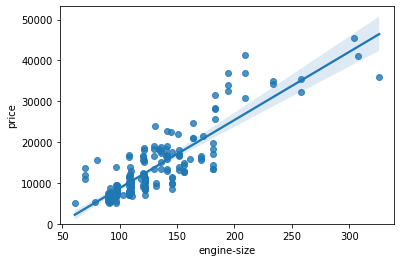

In [ ]:
# Tamaño del motor como potencial variable predictora del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un indicador bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.</p>


Podemos examinar la correlación entre 'tamaño del motor' y 'precio' y ver que es aproximadamente 0,87.

In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000



El mpg en carretera es una variable predictiva potencial del precio. Encontremos el diagrama de dispersión de "mpg en carretera" y "precio".


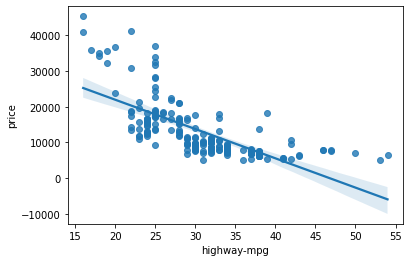

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>A medida que aumenta el mpg en carretera, el precio disminuye: esto indica una relación inversa/negativa entre estas dos variables. El mpg en carretera podría ser un predictor del precio.</p>



Podemos examinar la correlación entre 'mpg en carretera' y 'precio' y ver que es aproximadamente -0.704.


In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000



<h3>Relación lineal débil</h3>


Veamos si "pico-rpm" es una variable predictora de "precio".


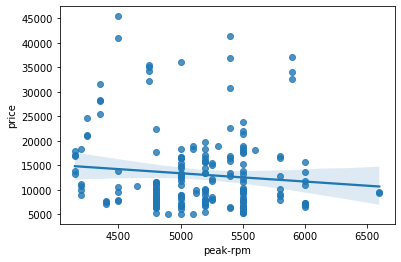

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Las rpm máximas no parecen ser un buen predictor del precio en absoluto, ya que la línea de regresión está cerca de la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, mostrando mucha variabilidad. Por lo tanto, no es una variable confiable.</p>


Podemos examinar la correlación entre 'rpm pico' y 'precio' y ver que es aproximadamente -0.101616


In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 
Pregunta 3 a): </h1>

<p>
Encuentra la correlación entre x="carrera" y y="precio".</p>
<p>Sugerencia: si desea seleccionar esas columnas, use la siguiente sintaxis: df[["stroke","price"]].  </p>
</div>


In [ ]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<div class="alerta alerta-peligro alertapeligro" estilo="margin-top: 20px">
<h1>Pregunta 3 b):</h1>

<p>Dados los resultados de la correlación entre "precio" y "carrera", ¿espera una relación lineal?</p>
<p>Verifica tus resultados usando la función "regplot()".</p>
</div>


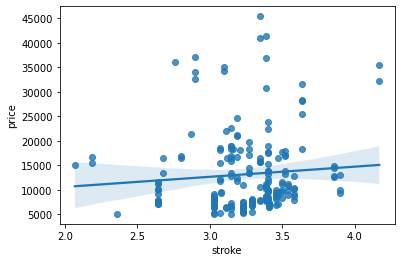

In [ ]:
sns.regplot(x="stroke", y="price", data=df)

<h3>Variables categóricas</h3>

<p>Estas son variables que describen una "característica" de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo "objeto" o "int64". Una buena forma de visualizar variables categóricas es mediante diagramas de caja.</p>



Veamos la relación entre "estilo de carrocería" y "precio".


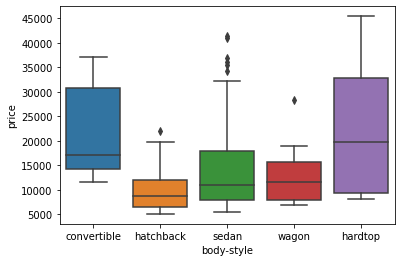

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)


<p>Vemos que las distribuciones de precio entre las diferentes categorías de estilo de carrocería tienen una superposición significativa, por lo que el estilo de carrocería no sería un buen predictor del precio. Examinemos la "ubicación del motor" y el "precio" del motor:</p>


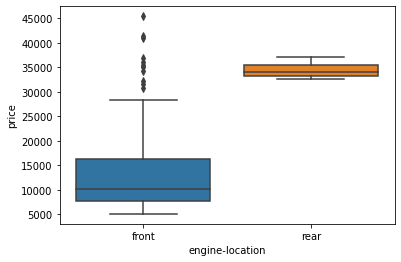

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor, delantera y trasera, son lo suficientemente distintas como para tomar la ubicación del motor como un buen predictor potencial del precio.</p>



Examinemos "ruedas motrices" y "precio".


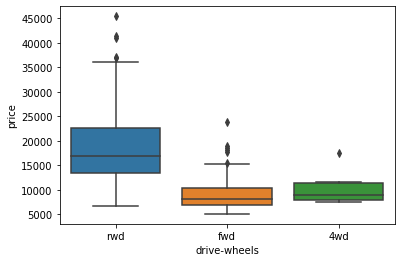

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=df)


<p>Aquí vemos que la distribución del precio entre las diferentes categorías de ruedas motrices es diferente. Como tal, las ruedas motrices podrían potencialmente predecir el precio.</p>


<h2 id="estadísticas_descriptivas">3. Análisis Estadístico Descriptivo</h2>


<p>Primero echemos un vistazo a las variables utilizando un método de descripción.</p>

<p>La función <b>describe</b> calcula automáticamente estadísticas básicas para todas las variables continuas. Cualquier valor de NaN se omite automáticamente en estas estadísticas.</p>

Esto mostrará:

<ul>
    <li>El recuento de esa variable</li>
    <li>La media</li>
    <li>La desviación estándar (std)</li>
    <li>El valor mínimo</li>
    <li>El IQR (rango intercuartílico: 25 %, 50 % y 75 %)</li>
    <li>El valor máximo</li>
<ul>



Podemos aplicar el método "describe" de la siguiente manera:


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,53.766667,2.447822,47.800000,52.000000,54.100000,55.500000,59.800000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,197.0,3.256904,0.319256,2.070000,3.110000,3.290000,3.410000,4.170000
compression-ratio,201.0,10.164279,4.004965,7.000000,8.600000,9.000000,9.400000,23.000000


La configuración predeterminada de "describir" omite variables de tipo objeto. Podemos aplicar el método "describe" sobre las variables de tipo 'objeto' de la siguiente manera:


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
make,201,22,toyota,32
aspiration,201,2,std,165
num-of-doors,201,2,four,115
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-location,201,2,front,198
engine-type,201,6,ohc,145
num-of-cylinders,201,7,four,157
fuel-system,201,8,mpfi,92
horsepower-binned,200,3,Low,115



<h3>Cuentas de valor</h3>


<p>Value Counts es una buena manera de entender cuántas unidades de cada característica/variable tenemos. Podemos aplicar el método "value_counts" en la columna "drive-wheels". No olvide que el método "value_counts" solo funciona en series de pandas, no en marcos de datos de pandas. Como resultado, solo incluimos un corchete <code>df['drive-wheels']</code>, no dos corchetes <code>df[['drive-wheels']]</code>.</p>


In [ ]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos convertir la serie a un marco de datos de la siguiente manera:


In [ ]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8



Repitamos los pasos anteriores, pero guardemos los resultados en el marco de datos "drive_wheels_counts" y cambiemos el nombre de la columna 'drive-wheels' a 'value_counts'.


In [ ]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8



Ahora cambiemos el nombre del índice a 'drive-wheels':

In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir el proceso anterior para la variable 'ubicación del motor'.


In [ ]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>Después de examinar los recuentos de valor de la ubicación del motor, vemos que la ubicación del motor no sería una buena variable de predicción del precio. Esto se debe a que solo tenemos tres autos con motor trasero y 198 con motor delantero, por lo que este resultado está sesgado. Por lo tanto, no podemos sacar ninguna conclusión sobre la ubicación del motor.</p>


<h2 id="agrupación_básica">4. Conceptos básicos de agrupación</h2>


<p>El método "groupby" agrupa datos por diferentes categorías. Los datos se agrupan en función de una o varias variables, y el análisis se realiza en los grupos individuales.</p>

<p>Por ejemplo, agrupemos por la variable "ruedas motrices". Vemos que hay 3 categorías diferentes de ruedas motrices.</p>

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Si queremos saber, en promedio, qué tipo de rueda motriz es más valiosa, podemos agrupar "ruedas motrices" y luego promediarlas.</p>

<p>Podemos seleccionar las columnas 'drive-wheels', 'body-style' y 'price', y luego asignarlas a la variable "df_group_one".</p>

In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]

Luego podemos calcular el precio promedio para cada una de las diferentes categorías de datos.


In [ ]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>


In [ ]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
# grouping results


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you did not import "pyplot", let's do it again.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs. Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [ ]:
df.corr()

Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [ ]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).


### Curb-Weight vs. Price


Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

#### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [ ]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

In [ ]:
df_gptest

We can obtain the values of the method group using the method "get_group".


In [ ]:
grouped_test2.get_group('4wd')['price']

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### fwd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

Let's examine the other groups.


#### 4wd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

<h4>4wd and fwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
